# Single-Leptoquark (500MeV) Analysis
This document  is an introductory pyroot notebook for the selection of leptoquarks produced in a VBF-Like signal: the MC-simulation was produced via Madgraph, the parameters of CMS experiment have been used for the delphes stage.

Proc-commands produce an on-shell vector leptoquark accompanied by a tau lepton and a light-jet, where the leptoquark decays into a b-tau pair.

In [1]:
!cat Single_LQ_Proc.mg5

import model Mod2_VLQ_UFO
define p = g u c d s u~ c~ d~ s~ b b~
define j = g u c d s u~ c~ d~ s~
define ta = ta+ ta-
define qb = b b~
define lq = vlq vlq~
define lep = l+ l-
generate p p > j ta lq, lq > ta qb 
output Single_vlq_mlq500_2 -nojpeg


The paramcard was previously generated with the best-fit in 2103.16558 for a leptoquark mass of 500MeV.

In [2]:
!cat /disco4/SIMULACIONES/Cristian/Madgraph/BR_LQ/Events/run_01/param_card.dat

######################################################################
## PARAM_CARD AUTOMATICALY GENERATED BY MG5                       ####
######################################################################
###################################
## INFORMATION FOR CKMBLOCK
###################################
BLOCK CKMBLOCK # 
      1 2.277360e-01 # cabi
###################################
## INFORMATION FOR MASS
###################################
BLOCK MASS # 
      6 1.720000e+02 # mt
      23 9.118760e+01 # mz
      25 1.250000e+02 # mh
      9000005 4.000000e+03 # mgp
      9000006 5.000000e+02 # mzp
      9000007 5.000000e+02 # mvlq
      1 0.000000e+00 # d : 0.0
      2 0.000000e+00 # u : 0.0
      3 0.000000e+00 # s : 0.0
      4 0.000000e+00 # c : 0.0
      5 0.000000e+00 # b : 0.0
      11 0.000000e+00 # e- : 0.0
      12 0.000000e+00 # ve : 0.0
      13 0.000000e+00 # mu- : 0.0
      14 0.000000e+00 # vm : 0.0
      15 0.000000e+00 # ta- : 0.0
      16 0.000000e+00 # vt : 

However, to isolate as much as possible our channel of interest, we have modified the UFO to exclude couplings that are not third generation and I've turned off the potential coupling between the leptoquark and z-prime.

Here the principal process are: 

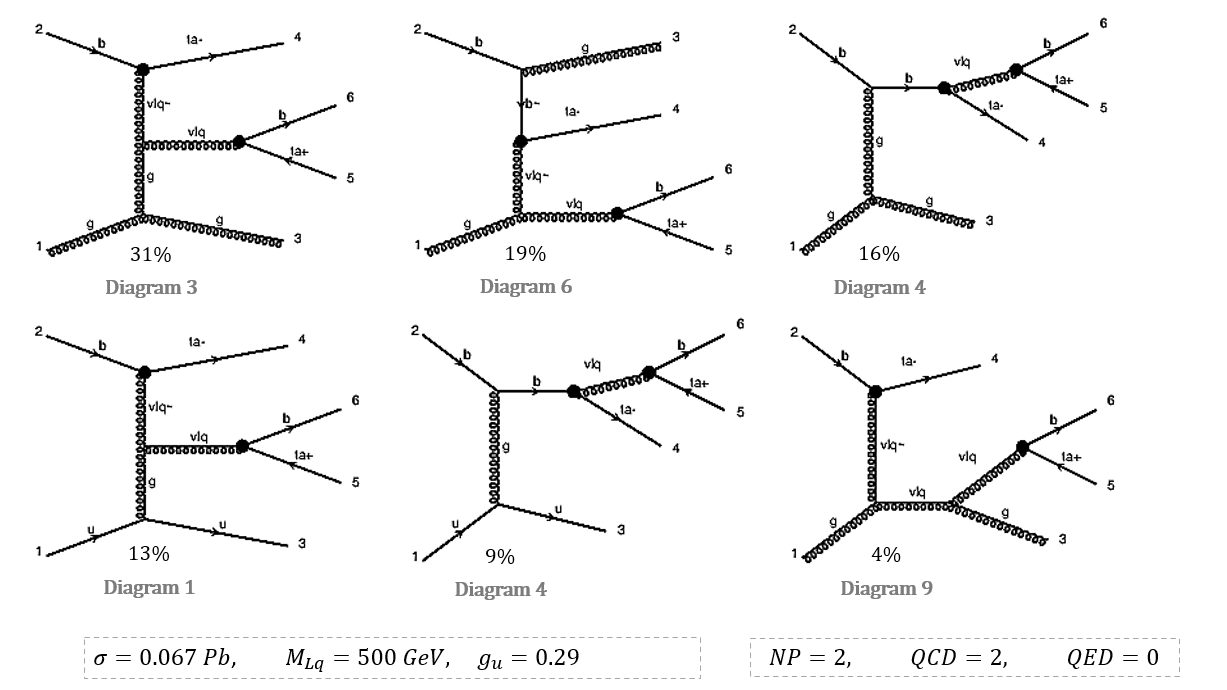

Assuming that both tau leptons decay in a hadronic way, we will have a signal with 4 jets, two of them are τ-jets, one of them is a bjet and a light-jet.

In [3]:
import os 
import ROOT
import math
from ROOT import *
from lhereader import readLHEF 


Welcome to JupyROOT 6.22/06


Due to the extensive size of the dataset generated in delphes, we have added a parameter that allows you to choose whether to run the analysis on a small part of the dataset for code testing (`False`) or on the entire dataset for statistical analysis (`True`).


In [4]:
dir_path = os.path.abspath('')
parton_analysis=True
fullAnalysis = True
namesignal="SingleLQ_500"
print(dir_path)

/disco4/SIMULACIONES/Cristian/nootebooks


The information of the events generated in each madgraph run is stored in the `Events` folder. The following script makes a reading of how many runs are inside `Events`.

In [5]:
jobs=0
dir_name = "/disco4/SIMULACIONES/Cristian/Madgraph/Single_vlq_mlq500_2" + "/Events"
#Read how many runs are in /Events
if (fullAnalysis): 
    dirs = next(os.walk(dir_name))[1]
    jobs = len(dirs)
else: jobs=2


A TChain is declared for delphes and it is initialized with the output of each run in madgraph.

In [6]:
tree=[]
if (parton_analysis):
    for ind in range(jobs):
        os.system("gzip -dk " + dir_name +"/run_" + '%02d' % (ind+1) + "/unweighted_events.lhe.gz")
        directory= str(dir_name +"/run_" + '%02d' % (ind+1) +"/unweighted_events.lhe")
        data=readLHEF( dir_name +"/run_" + '%02d' % (ind+1) + "/unweighted_events.lhe")
        print("Run found in "+ directory)
        subtree=data.events
        tree+=subtree
    print("Total events uploaded: " + str(len(tree)))
else :
    tree = TChain("Delphes;1")
    for ind in range(jobs):
        directory= str(dir_name +"/run_" + '%02d' % (ind+1) +"/tag_1_delphes_events.root")
        print("Run found in "+ directory)
        tree.Add(directory)
    print("Total events uploaded: " + str(tree.GetEntries()))

Run found in /disco4/SIMULACIONES/Cristian/Madgraph/Single_vlq_mlq500_2/Events/run_01/unweighted_events.lhe
Run found in /disco4/SIMULACIONES/Cristian/Madgraph/Single_vlq_mlq500_2/Events/run_02/unweighted_events.lhe
Run found in /disco4/SIMULACIONES/Cristian/Madgraph/Single_vlq_mlq500_2/Events/run_03/unweighted_events.lhe
Run found in /disco4/SIMULACIONES/Cristian/Madgraph/Single_vlq_mlq500_2/Events/run_04/unweighted_events.lhe
Run found in /disco4/SIMULACIONES/Cristian/Madgraph/Single_vlq_mlq500_2/Events/run_05/unweighted_events.lhe
Run found in /disco4/SIMULACIONES/Cristian/Madgraph/Single_vlq_mlq500_2/Events/run_06/unweighted_events.lhe
Run found in /disco4/SIMULACIONES/Cristian/Madgraph/Single_vlq_mlq500_2/Events/run_07/unweighted_events.lhe
Run found in /disco4/SIMULACIONES/Cristian/Madgraph/Single_vlq_mlq500_2/Events/run_08/unweighted_events.lhe
Run found in /disco4/SIMULACIONES/Cristian/Madgraph/Single_vlq_mlq500_2/Events/run_09/unweighted_events.lhe
Run found in /disco4/SIMULAC

gzip: /disco4/SIMULACIONES/Cristian/Madgraph/Single_vlq_mlq500_2/Events/run_01/unweighted_events.lhe already exists;	not overwritten
gzip: /disco4/SIMULACIONES/Cristian/Madgraph/Single_vlq_mlq500_2/Events/run_02/unweighted_events.lhe already exists;	not overwritten
gzip: /disco4/SIMULACIONES/Cristian/Madgraph/Single_vlq_mlq500_2/Events/run_03/unweighted_events.lhe already exists;	not overwritten
gzip: /disco4/SIMULACIONES/Cristian/Madgraph/Single_vlq_mlq500_2/Events/run_04/unweighted_events.lhe already exists;	not overwritten
gzip: /disco4/SIMULACIONES/Cristian/Madgraph/Single_vlq_mlq500_2/Events/run_05/unweighted_events.lhe already exists;	not overwritten
gzip: /disco4/SIMULACIONES/Cristian/Madgraph/Single_vlq_mlq500_2/Events/run_06/unweighted_events.lhe already exists;	not overwritten
gzip: /disco4/SIMULACIONES/Cristian/Madgraph/Single_vlq_mlq500_2/Events/run_07/unweighted_events.lhe already exists;	not overwritten
gzip: /disco4/SIMULACIONES/Cristian/Madgraph/Single_vlq_mlq500_2/Even

In the delphes output we can find the kinematic information of each jet which is stored in a TLorentzVector, in addition delphes makes a Tagging process which helps us identify the parton that has become in each jet.

We define a structure that is fed with this information and it has as parameters the relevant information of each  jet from the output of delphes.

In [7]:
class JetVector():
    def __init__(self, event, j):
        self.TLV=TLorentzVector()
        self.TLV.SetPtEtaPhiM(
            event.GetLeaf("Jet.PT").GetValue(j), 
            event.GetLeaf("Jet.Eta").GetValue(j), 
            event.GetLeaf("Jet.Phi").GetValue(j), 
            event.GetLeaf("Jet.Mass").GetValue(j)
        )
        self.BTag   = event.GetLeaf("Jet.BTag").GetValue(j)
        self.Charge = event.GetLeaf("Jet.Charge").GetValue(j)
        self.TauTag = event.GetLeaf("Jet.TauTag").GetValue(j)

We define a function that has an event as input and extracts the information of all the jets in that event. In addition, it applies the kinematic cuts that allow us to define a good jet, *i.e.*, that the b-jets and tau-jets are within the fiducial region of the tracker (η < 2.5) and have enough transverse momentum (20 GeV for the τ-jets and 30GeV for the b-jets), and that the light-jets have a minimum moment of 30 GeV.

This function returns a sorted list per transverse moment for each type of jet.

In [8]:
def PT(jet):
    return jet.TLV.Pt()

def getGoodJets(event):
    jets = []
    b_jets = []
    tau_jets = []
    all_jets = []
    other_jets=[]
    
    Ljet_Pt_cut=30.
    Ljet_Eta_cut=5.
    
    bjet_Pt_cut=30.
    bjet_Eta_cut=2.5
    
    taujet_Pt_cut=20.
    taujet_Eta_cut=2.5
    
    if (parton_analysis):
        jets_wcut=event.getParticlesByIDs([-4,-3,-2,-1,1,2,3,4,21])
        for jet in jets_wcut :
            ptcut= (jet.TLV.Pt()>= Ljet_Pt_cut)
            etacut= (abs(jet.TLV.Eta())<= Ljet_Eta_cut)
            if (ptcut and etacut ):
                jets.append(jet)
                all_jets.append(jet)
                
        bjets_wcut=event.getParticlesByIDs([-5,5])
        for jet in bjets_wcut :
            ptcut= (jet.TLV.Pt()>= bjet_Pt_cut)
            etacut= (abs(jet.TLV.Eta())<= bjet_Eta_cut)
            if (ptcut and etacut ):
                b_jets.append(jet)
                all_jets.append(jet)
                
        taus_wcut=event.getParticlesByIDs([-15,15])
        for jet in taus_wcut :
            ptcut= (jet.TLV.Pt()>= taujet_Pt_cut)
            etacut= (abs(jet.TLV.Eta())<= taujet_Eta_cut)
            if (ptcut and etacut ):
                tau_jets.append(jet)
                all_jets.append(jet)
                
    else :
        n_jets=event.Jet.GetEntries()
        for j in range(n_jets):
            jet=JetVector(event, j)
            #Classify by type jet according to its Tag
            #apply its corresponding kinematic cut.
            if( jet.BTag==0 and jet.TauTag==0):
                ptcut= (jet.TLV.Pt()>= Ljet_Pt_cut)
                etacut= (abs(jet.TLV.Eta())<= Ljet_Eta_cut)
                if (ptcut and etacut ):
                    jets.append(jet)
                    all_jets.append(jet)
            elif( jet.BTag==1 and jet.TauTag==0): 
                ptcut= (jet.TLV.Pt()>= bjet_Pt_cut)
                etacut= (abs(jet.TLV.Eta())<= bjet_Eta_cut)
                if (ptcut and etacut ):
                    b_jets.append(jet)
                    all_jets.append(jet)
            elif( jet.BTag==0 and jet.TauTag==1): 
                ptcut= (jet.TLV.Pt()>= taujet_Pt_cut)
                etacut= (abs(jet.TLV.Eta())<= taujet_Eta_cut)
                if (ptcut and etacut ):
                    tau_jets.append(jet)
                    all_jets.append(jet)
            else: 
                ptcut= (jet.TLV.Pt()>= Ljet_Pt_cut)
                etacut= (abs(jet.TLV.Eta())<= Ljet_Eta_cut)
                if (ptcut and etacut ):
                    other_jets.append(jet)
                    all_jets.append(jet)
    jets.sort      ( reverse = True , key=PT )
    b_jets.sort    ( reverse = True , key=PT )
    tau_jets.sort  ( reverse = True , key=PT )
    all_jets.sort  ( reverse = True , key=PT )
    other_jets.sort( reverse = True , key=PT )
    return all_jets, jets, b_jets, tau_jets, other_jets

Now, we continue to define functions to evaluate the possible correlation between kinematic variables to the different jets.

In [9]:
def DeltaR(v1,v2):
    return v1.TLV.DeltaR(v2.TLV)

def DeltaEta(v1,v2):
    return v1.TLV.Eta() - v2.TLV.Eta()

def DeltaPhi(v1,v2):
    #return v1.TLV.Phi()-v2.TLV.Phi()
    return v1.TLV.DeltaPhi(v2.TLV)

def sDeltaPT(v1,v2):
    return PT(v1) - PT(v2)

def vDeltaPT(v1,v2):
    a=TVector2(v1.TLV.Px(),v1.TLV.Py())
    b=TVector2(v2.TLV.Px(),v2.TLV.Py())
    c=a-b
    return c.Mod()

def vDeltaP(v1,v2):
    a=TVector3(v1.TLV.Px(),v1.TLV.Py(),v1.TLV.Pz())
    b=TVector3(v2.TLV.Px(),v2.TLV.Py(),v2.TLV.Pz())
    c=a-b
    return c.Mag()

In [10]:
canvas = TCanvas("Canvas","",800,600)
canvas.SetGrid()
cutflow = TH1F("cutflow","Cutflow; Cut; Events",10,0,10)
hist_njets = TH1F("Number of jets","n-jets; Jet multiplicity; Events",10,0,10)

hist_m_LQ=TH1F("hist_m_LQ", "M_{b+#tau_{lq}}", 40, 0.0, 2000.0)
hist_pt_LQ=TH1F("hist_pt_LQ", "Pt_{b+#tau_{lq}}", 40, 0.0, 2000.0)

hist_met=TH1F("hist_met", "MeT", 40, 0.0, 2000.0)
hist_m_LQ_met=TH1F("hist_m_LQ_met", "M_{b+#tau_{2}}", 40, 0.0, 2000.0)
hist_pt_LQ_met=TH1F("hist_pt_LQ_met", "Pt_{b+#tau_{2}}", 40, 0.0, 2000.0)

pt_all_jets=TH1F("pt_all_jets", "Pt_{allj}", 100, 0.0, 600.0)
p_all_jets=TH1F("p_all_jets", "P_{allj}", 100, 0.0, 600.0)
eta_all_jets=TH1F("eta_all_jets", "#eta_{allj}", 100, -5, 5)
pt_all_jets.SetLineColor(kBlack)
p_all_jets.SetLineColor(kBlack)
eta_all_jets.SetLineColor(kBlack)

pt_lead_jets=TH1F("pt_lead_jets", "Pt_{j1}", 100, 0.0, 600.0)
p_lead_jets=TH1F("p_lead_jets", "P_{j1}", 100, 0.0, 600.0)
eta_lead_jets=TH1F("eta_lead_jets", "#eta_{j1}", 100, -5, 5)
pt_lead_jets.SetLineColor(kBlue)
p_lead_jets.SetLineColor(kBlue)
eta_lead_jets.SetLineColor(kBlue)
pt_lead_bjets=TH1F("pt_lead_bjets", "Pt_{bj1}", 100, 0.0, 600.0)
p_lead_bjets=TH1F("p_lead_bjets", "P_{bj1}", 100, 0.0, 600.0)
eta_lead_bjets=TH1F("eta_lead_bjets", "#eta_{bj2}", 100, -5, 5)
pt_lead_bjets.SetLineColor(kRed)
p_lead_bjets.SetLineColor(kRed)
eta_lead_bjets.SetLineColor(kRed)
pt_lead_taus=TH1F("pt_lead_taus", "Pt_{tau1}", 100, 0.0, 600.0)
p_lead_taus=TH1F("p_lead_taus", "P_{tau1}", 100, 0.0, 600.0)
eta_lead_taus=TH1F("eta_lead_taus", "#eta_tau1", 100, -5, 5)
pt_lead_taus.SetLineColor(8)
p_lead_taus.SetLineColor(8)
eta_lead_taus.SetLineColor(8)
pt_slead_taus=TH1F("pt_slead_taus", "Pt_tau2", 100, 0.0, 600.0)
p_slead_taus=TH1F("p_slead_taus", "P_tau2", 100, 0.0, 600.0)
eta_slead_taus=TH1F("eta_slead_taus", "#eta_tau2", 100, -5, 5)
pt_slead_taus.SetLineColor(kViolet)
p_slead_taus.SetLineColor(kViolet)
eta_slead_taus.SetLineColor(kViolet)

hist_deltar_taus=TH1F("deta_taus","#Delta R_{#tau_{1}#tau_{2}}",100,0,8) 
hist_deltar_b_ltau=TH1F("deltar_b_ltau","#Delta R_{b#tau_{1}}",100,0,8) 
hist_deltar_b_sltau=TH1F("deltar_b_sltau","#Delta R_{b#tau_{2}}",100,0,8) 
hist_deltar_j_ltau=TH1F("deltar_j_ltau","#Delta R_{j#tau_{1}}",100,0,8) 
hist_deltar_j_sltau=TH1F("deltar_j_sltau","#Delta R_{j#tau_{2}}",100,0,8) 
hist_deltar_b_j=TH1F("deltar_b_j","#Delta R_{bj}",100,0,8)

hist_deltaEta_taus=TH1F("deltaEta_taus","#Delta #eta_{#tau_{1}#tau_{2}}",100,-5,5)
hist_deltaEta_b_ltau=TH1F("deltaEta_b_ltau","#Delta #eta_{b#tau_{1}}",100,-5,5) 
hist_deltaEta_b_sltau=TH1F("deltaEta_b_sltau","#Delta #eta_{b#tau_{2}}",100,-5,5) 
hist_deltaEta_j_ltau=TH1F("deltaEta_j_ltau","#Delta #eta_{j#tau_{1}}",100,-5,5) 
hist_deltaEta_j_sltau=TH1F("deltaEta_j_sltau","#Delta #eta_{j#tau_{2}}",100,-5,5) 
hist_deltaEta_b_j=TH1F("deltaEta_b_j","#Delta #eta_{bj}",100,-5,5)

hist_deltaPhi_taus=TH1F("deltaPhi_taus","#Delta #phi_{#tau_{1}#tau_{2}}",70,-3.5,3.5) 
hist_deltaPhi_b_ltau=TH1F("deltaPhi_b_ltau","#Delta #phi_{b#tau_{1}}",70,-3.5,3.5) 
hist_deltaPhi_b_sltau=TH1F("deltaPhi_b_sltau","#Delta #phi_{b#tau_{2}}",70,-3.5,3.5) 
hist_deltaPhi_j_ltau=TH1F("deltaPhi_j_ltau","#Delta #phi_{j#tau_{1}}",70,-3.5,3.5) 
hist_deltaPhi_j_sltau=TH1F("deltaPhi_j_sltau","#Delta #phi_{j#tau_{2}}",70,-3.5,3.5) 
hist_deltaPhi_b_j=TH1F("deltaPhi_b_j","#Delta #phi_{bj}",70,-3.5,3.5) 

hist_sdPT_taus=TH1F("sdPT_taus","#Delta PT_{#tau_{1}#tau_{2}}",100,-800,800) 
hist_sdPT_b_ltau=TH1F("sdPT_b_ltau","#Delta PT_{b#tau_{1}}",100,-800,800) 
hist_sdPT_b_sltau=TH1F("sdPT_b_sltau","#Delta PT_{b#tau_{2}}",100,-800,800) 
hist_sdPT_j_ltau=TH1F("sdPT_j_ltau","#Delta PT_{j#tau_{1}}",100,-800,800) 
hist_sdPT_j_sltau=TH1F("sdPT_j_sltau","#Delta PT_{j#tau_{2}}",100,-800,800) 
hist_sdPT_b_j=TH1F("sdPT_b_j","#Delta PT_{bj}",100,-800,800)

hist_vdPT_taus=TH1F("vdPT_taus","#Delta #vec{PT}_{#tau_{1}#tau_{2}}",100,0,1000) 
hist_vdPT_b_ltau=TH1F("vdPT_b_ltau","#Delta #vec{PT}_{b#tau_{1}}",100,0,800) 
hist_vdPT_b_sltau=TH1F("vdPT_b_sltau","#Delta #vec{PT}_{b#tau_{2}}",100,0,800) 
hist_vdPT_j_ltau=TH1F("vdPT_j_ltau","#Delta #vec{PT}_{j#tau_{1}}",100,0,800) 
hist_vdPT_j_sltau=TH1F("vdPT_j_sltau","#Delta #vec{PT}_{j#tau_{2}}",100,0,800) 
hist_vdPT_b_j=TH1F("vdPT_b_j","#Delta #vec{PT}_{bj}",100,0,800)

hist_vdP_taus=TH1F("vdP_taus","#Delta #vec{P}_{#tau_{1}#tau_{2}}",100,0,1000) 
hist_vdP_b_ltau=TH1F("vdP_b_ltau","#Delta #vec{P}_{b#tau_{1}}",100,0,800) 
hist_vdP_b_sltau=TH1F("vdP_b_sltau","#Delta #vec{P}_{b#tau_{2}}",100,0,800) 
hist_vdP_j_ltau=TH1F("vdP_j_ltau","#Delta #vec{P}_{j#tau_{1}}",100,0,800) 
hist_vdP_j_sltau=TH1F("vdP_j_sltau","#Delta #vec{P}_{j#tau_{2}}",100,0,800) 
hist_vdP_b_j=TH1F("vdP_b_j","#Delta #vec{P}_{bj}",100,0,800)


In [11]:
def FillHistos(allJ, jets, bjets, taus, other_jets):
    pt_lead_jets.Fill  ( jets[0].TLV.Pt()  )
    p_lead_jets.Fill  ( jets[0].TLV.P()  )
    eta_lead_jets.Fill ( jets[0].TLV.Eta() )
    pt_lead_bjets.Fill ( bjets[0].TLV.Pt() )
    p_lead_bjets.Fill ( bjets[0].TLV.P() )
    eta_lead_bjets.Fill( bjets[0].TLV.Eta())
    pt_lead_taus.Fill  ( taus[0].TLV.Pt() )
    p_lead_taus.Fill  ( taus[0].TLV.P()  )
    eta_lead_taus.Fill ( taus[0].TLV.Eta() )
    pt_slead_taus.Fill ( taus[1].TLV.Pt()  )
    p_slead_taus.Fill ( taus[1].TLV.P()  )
    eta_slead_taus.Fill( taus[1].TLV.Eta() )
    
    pt_all_jets.Fill ( bjets[0].TLV.Pt() )
    p_all_jets.Fill ( bjets[0].TLV.P() )
    eta_all_jets.Fill( bjets[0].TLV.Eta())
    pt_all_jets.Fill ( taus[0].TLV.Pt()  )
    p_all_jets.Fill ( taus[0].TLV.P()  )
    eta_all_jets.Fill( taus[0].TLV.Eta() )
    pt_all_jets.Fill ( taus[1].TLV.Pt()  )
    p_all_jets.Fill ( taus[1].TLV.P()  )
    eta_all_jets.Fill( taus[1].TLV.Eta() )

    pt_all_jets.Fill ( jets[0].TLV.Pt()   )
    p_all_jets.Fill ( jets[0].TLV.P()   )
    eta_all_jets.Fill( jets[0].TLV.Eta()  )
    hist_deltar_taus.Fill(DeltaR(taus[0],taus[1]))
    hist_deltar_b_ltau.Fill(DeltaR(bjets[0],taus[0]))
    hist_deltar_b_sltau.Fill(DeltaR(bjets[0],taus[1]))
    hist_deltar_j_ltau.Fill(DeltaR(jets[0],taus[0]))
    hist_deltar_j_sltau.Fill(DeltaR(jets[0],taus[1]))
    hist_deltar_b_j.Fill(DeltaR(bjets[0],jets[0]))

    hist_deltaEta_taus.Fill(DeltaEta(taus[0],taus[1]))
    hist_deltaEta_b_ltau.Fill(DeltaEta(bjets[0],taus[0]))
    hist_deltaEta_b_sltau.Fill(DeltaEta(bjets[0],taus[1]))
    hist_deltaEta_j_ltau.Fill(DeltaEta(jets[0],taus[0]))
    hist_deltaEta_j_sltau.Fill(DeltaEta(jets[0],taus[1]))
    hist_deltaEta_b_j.Fill(DeltaEta(bjets[0],jets[0]))

    hist_deltaPhi_taus.Fill(DeltaPhi(taus[0],taus[1]))
    hist_deltaPhi_b_ltau.Fill(DeltaPhi(bjets[0],taus[0]))
    hist_deltaPhi_b_sltau.Fill(DeltaPhi(bjets[0],taus[1]))
    hist_deltaPhi_j_ltau.Fill(DeltaPhi(jets[0],taus[0]))
    hist_deltaPhi_j_sltau.Fill(DeltaPhi(jets[0],taus[1]))
    hist_deltaPhi_b_j.Fill(DeltaPhi(bjets[0],jets[0]))

    hist_sdPT_taus.Fill(sDeltaPT(taus[0],taus[1]))
    hist_sdPT_b_ltau.Fill(sDeltaPT(bjets[0],taus[0]))
    hist_sdPT_b_sltau.Fill(sDeltaPT(bjets[0],taus[1]))
    hist_sdPT_j_ltau.Fill(sDeltaPT(jets[0],taus[0]))
    hist_sdPT_j_sltau.Fill(sDeltaPT(jets[0],taus[1]))
    hist_sdPT_b_j.Fill(sDeltaPT(bjets[0],jets[0]))
    
    hist_vdPT_taus.Fill(vDeltaPT(taus[0],taus[1]))
    hist_vdPT_b_ltau.Fill(vDeltaPT(bjets[0],taus[0]))
    hist_vdPT_b_sltau.Fill(vDeltaPT(bjets[0],taus[1]))
    hist_vdPT_j_ltau.Fill(vDeltaPT(jets[0],taus[0]))
    hist_vdPT_j_sltau.Fill(vDeltaPT(jets[0],taus[1]))
    hist_vdPT_b_j.Fill(vDeltaPT(bjets[0],jets[0]))
        
    hist_vdP_taus.Fill(vDeltaP(taus[0],taus[1]))
    hist_vdP_b_ltau.Fill(vDeltaP(bjets[0],taus[0]))
    hist_vdP_b_sltau.Fill(vDeltaP(bjets[0],taus[1]))
    hist_vdP_j_ltau.Fill(vDeltaP(jets[0],taus[0]))
    hist_vdP_j_sltau.Fill(vDeltaP(jets[0],taus[1]))
    hist_vdP_b_j.Fill(vDeltaP(bjets[0],jets[0]))
    
    

In [12]:
!pip install etaprogress
import sys
import time
from etaprogress.progress import ProgressBar
if (parton_analysis):
    nEvents=len(tree)
else :
    nEvents=tree.GetEntries()

bar = ProgressBar(nEvents, max_width=60)

In [13]:
printEachPercent=12.5
bar.numerator = 0
print(bar)
nSplits=int(100/printEachPercent)

eff=0

for event in tree:
    bar.numerator+=1
    i=bar.numerator
    if int(nSplits*i/nEvents)!=int(nSplits*(i-1)/nEvents):
        print(bar)
    
    cutflow.Fill(0)
    
    
    #let's try to identify all the good jets
    allJ, jets, bjets, taus, other_jets = getGoodJets(event)
    n_jets=len(allJ)
    hist_njets.Fill(n_jets)
    
    #Discard events without goodjets
    if not (n_jets>0): continue
    cutflow.Fill(1)
    
    #Discard events with only one goodjet
    if not (n_jets>1): continue
    cutflow.Fill(2)
    
    #Discard events with only two or less goodjets
    if not (n_jets>2): continue
    cutflow.Fill(3)
    
    #Discard events with only three or less goodjets
    if not (n_jets>3): continue
    cutflow.Fill(4)
    
    
    #At this point we have at least 4 jets 
    
    #Discard events which no jet is identified as b-jet
    if not (len(bjets)==1): continue
    cutflow.Fill(5)
    
    #Discard events which no jet is identified as light-jet
    if not (len(jets)==1): continue
    cutflow.Fill(6)
    
    #Discard events which no jet is identified as tau-jet
    if not (len(taus)>0): continue
    cutflow.Fill(7)
    
    #Discard events in without two jets
    if not (len(taus)==2): continue
    cutflow.Fill(8)
    
    
    
    #Discard events which the taus have the same charge
    if ( taus[0].Charge==taus[1].Charge ): continue
    cutflow.Fill(9)
    eff+=1
    
    if (taus[0].Charge*bjets[0].Charge <0 ):
        vlq_tau = taus[0]
        jet_tau = taus[1]
    else :
        vlq_tau = taus[1]
        jet_tau = taus[0]
    
    FillHistos(allJ, jets, bjets, [vlq_tau,jet_tau], other_jets)
    
    
    LQ=bjets[0].TLV + vlq_tau.TLV
    
    hist_m_LQ.Fill(LQ.M())
    hist_pt_LQ.Fill(LQ.Pt())
    
    if (parton_analysis):
        met = 0.
        met_phi=0.
        met_eta=0.
    else :
        met=event.GetLeaf("MissingET.MET").GetValue()
        met_phi=event.GetLeaf("MissingET.Phi").GetValue()
        met_eta=event.GetLeaf("MissingET.Eta").GetValue()
    metTLV=TLorentzVector()
    metTLV.SetPtEtaPhiE(met,met_eta,met_phi,met)
    hist_met.Fill(metTLV.Pt())
    
    LQ=bjets[0].TLV + jet_tau.TLV
    #LQ+=metTLV
    hist_m_LQ_met.Fill(LQ.M())
    hist_pt_LQ_met.Fill(LQ.Pt())

  0% (     0/550000) [                         ] eta --:-- /
 12% ( 68750/550000) [###                      ] eta 02:30 -
 25% (137500/550000) [######                   ] eta 02:06 \
 37% (206250/550000) [#########                ] eta 02:07 |
 50% (275000/550000) [############             ] eta 01:27 /
 62% (343750/550000) [###############          ] eta 01:04 -
 75% (412500/550000) [##################       ] eta 00:44 \
 87% (481250/550000) [#####################    ] eta 00:22 |
100% (550000/550000) [#########################] eta 00:00 /


The particle selection efficiency is 94.92363636363636%


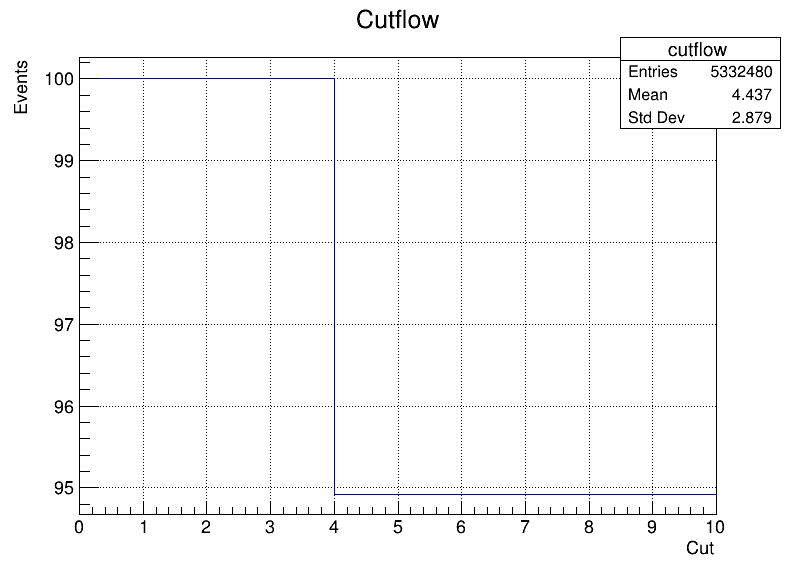

In [14]:
cutflow.Scale(100./nEvents)
cutflow.Draw("hist")
canvas.Draw()
mss="The particle selection efficiency is "
mss+=str(100.*eff/nEvents)
mss+="%"
print(mss)

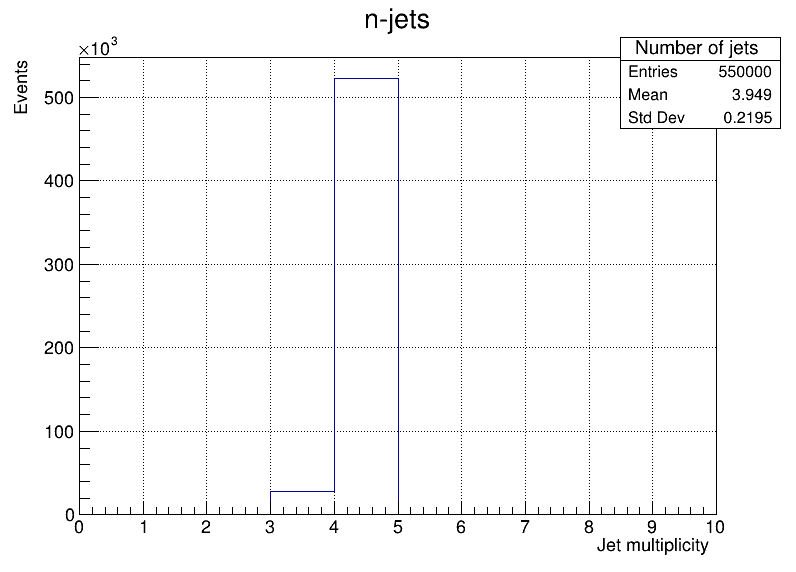

In [15]:
hist_njets.Draw()
canvas.Draw()

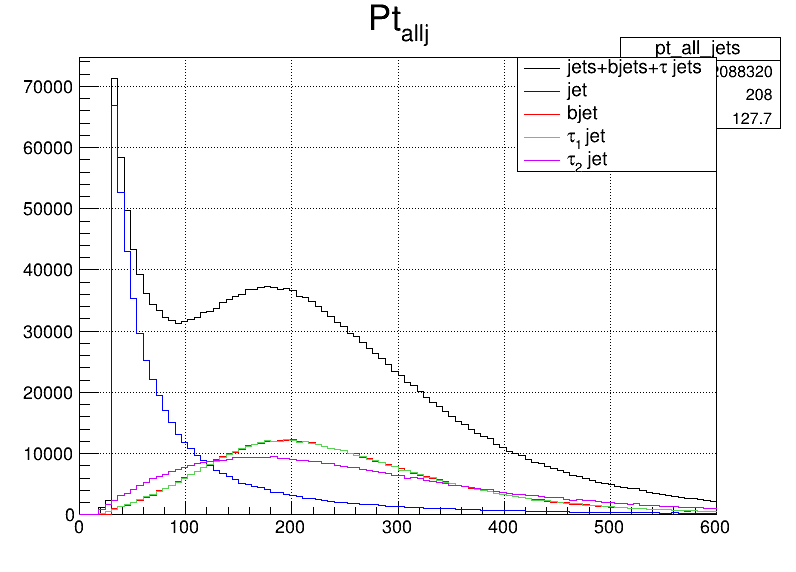

In [16]:
pt_all_jets.Draw("HIST")
pt_lead_jets.Draw("histsame")
pt_lead_bjets.Draw("histsame")
pt_lead_taus.Draw("histsame")
pt_slead_taus.Draw("histsame")

leg=ROOT.TLegend(0.9,0.9,0.65,0.70)
leg.AddEntry("pt_all_jets", "jets+bjets+#tau jets", "l")
leg.AddEntry("pt_lead_jets", "jet", "l")
leg.AddEntry("pt_lead_bjets", "bjet", "l")
leg.AddEntry("pt_lead_taus", "#tau_{1} jet", "l")
leg.AddEntry("pt_slead_taus", "#tau_{2} jet", "l")
leg.Draw()

canvas.Draw()

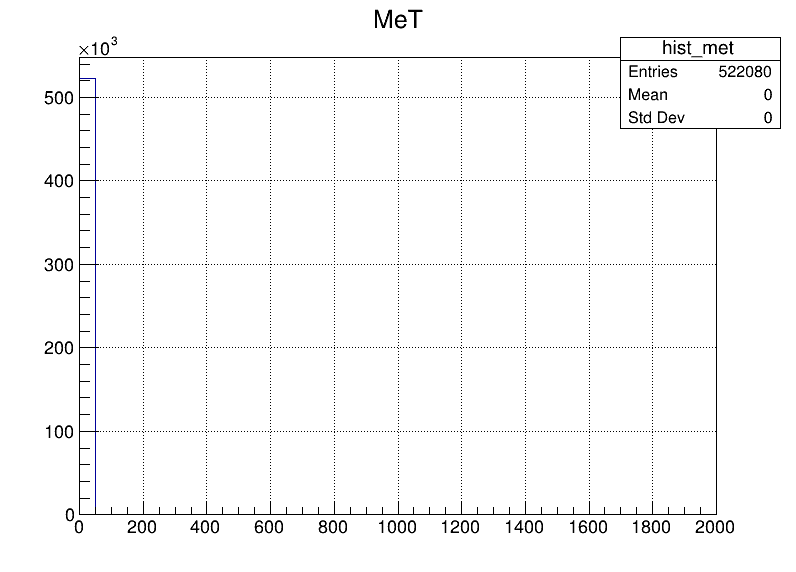

In [17]:
hist_met.Draw()
canvas.Draw() 

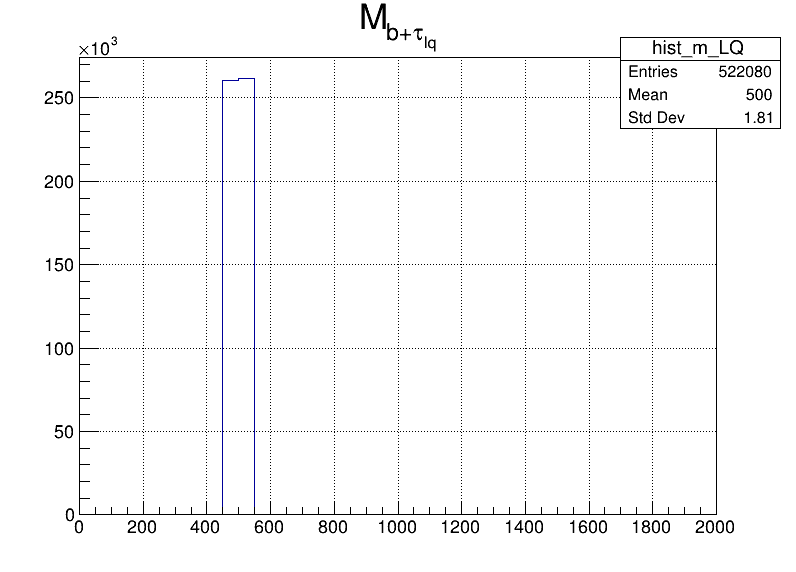

In [18]:
hist_m_LQ.Draw()
canvas.Draw() 

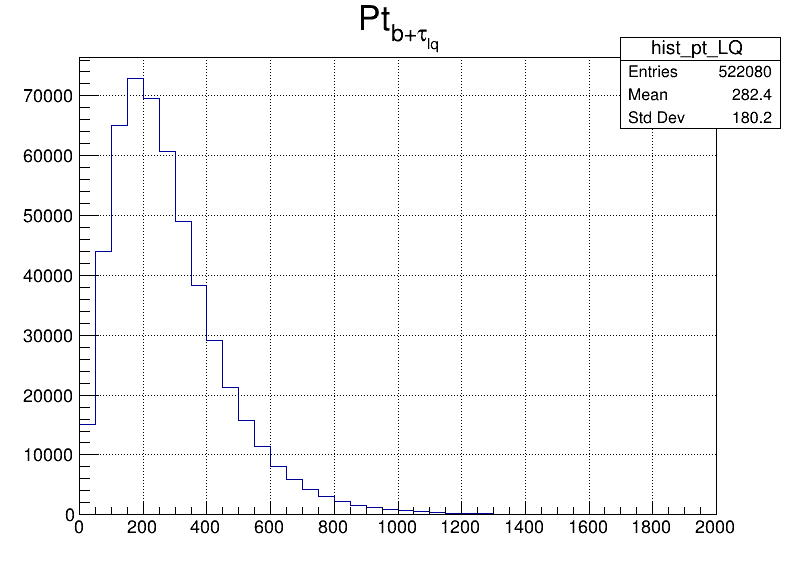

In [19]:
hist_pt_LQ.Draw()
canvas.Draw() 

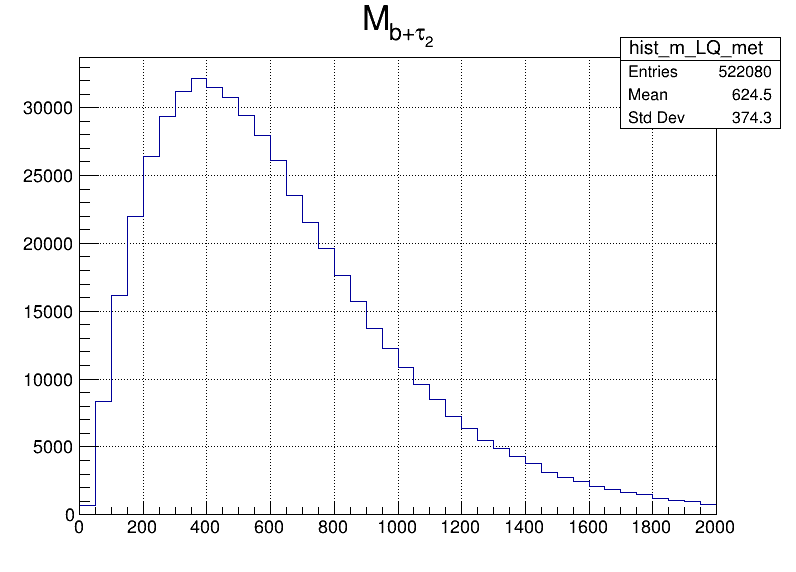

In [20]:
hist_m_LQ_met.Draw()
canvas.Draw() 

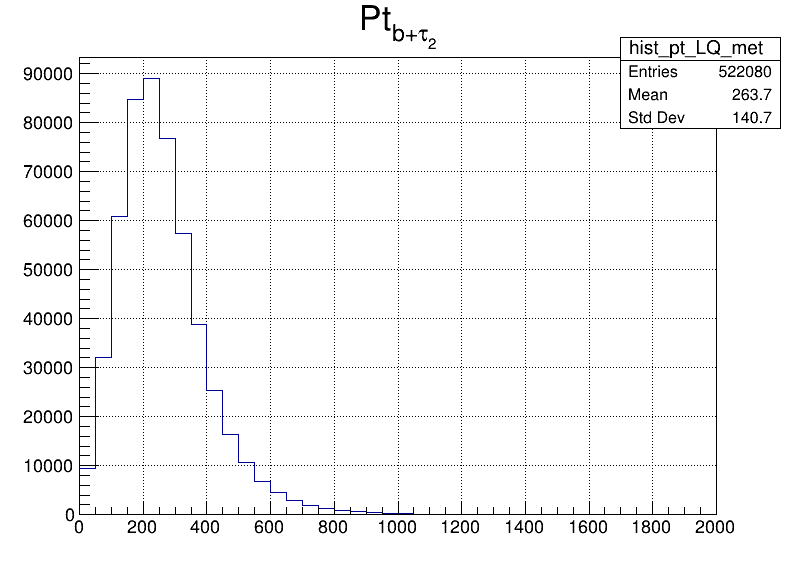

In [21]:
hist_pt_LQ_met.Draw()
canvas.Draw() 

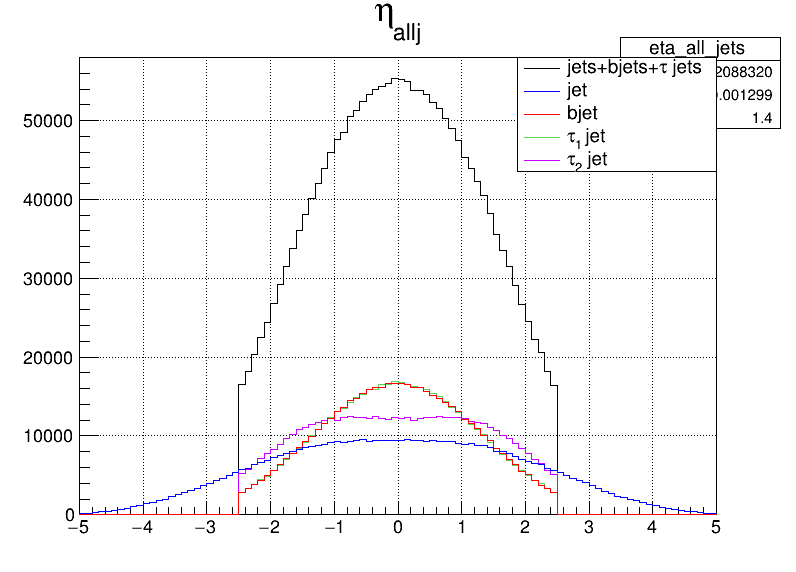

In [22]:
eta_all_jets.Draw("HIST")
eta_lead_taus.Draw("histsame")
eta_slead_taus.Draw("histsame")
eta_lead_bjets.Draw("histsame")
eta_lead_jets.Draw("histsame")
leg=ROOT.TLegend(0.9,0.9,0.65,0.70)
leg.AddEntry("eta_all_jets", "jets+bjets+#tau jets", "l")
leg.AddEntry("eta_lead_jets", "jet", "l")
leg.AddEntry("eta_lead_bjets", "bjet", "l")
leg.AddEntry("eta_lead_taus", "#tau_{1} jet", "l")
leg.AddEntry("eta_slead_taus", "#tau_{2} jet", "l")
leg.Draw()
canvas.Draw()

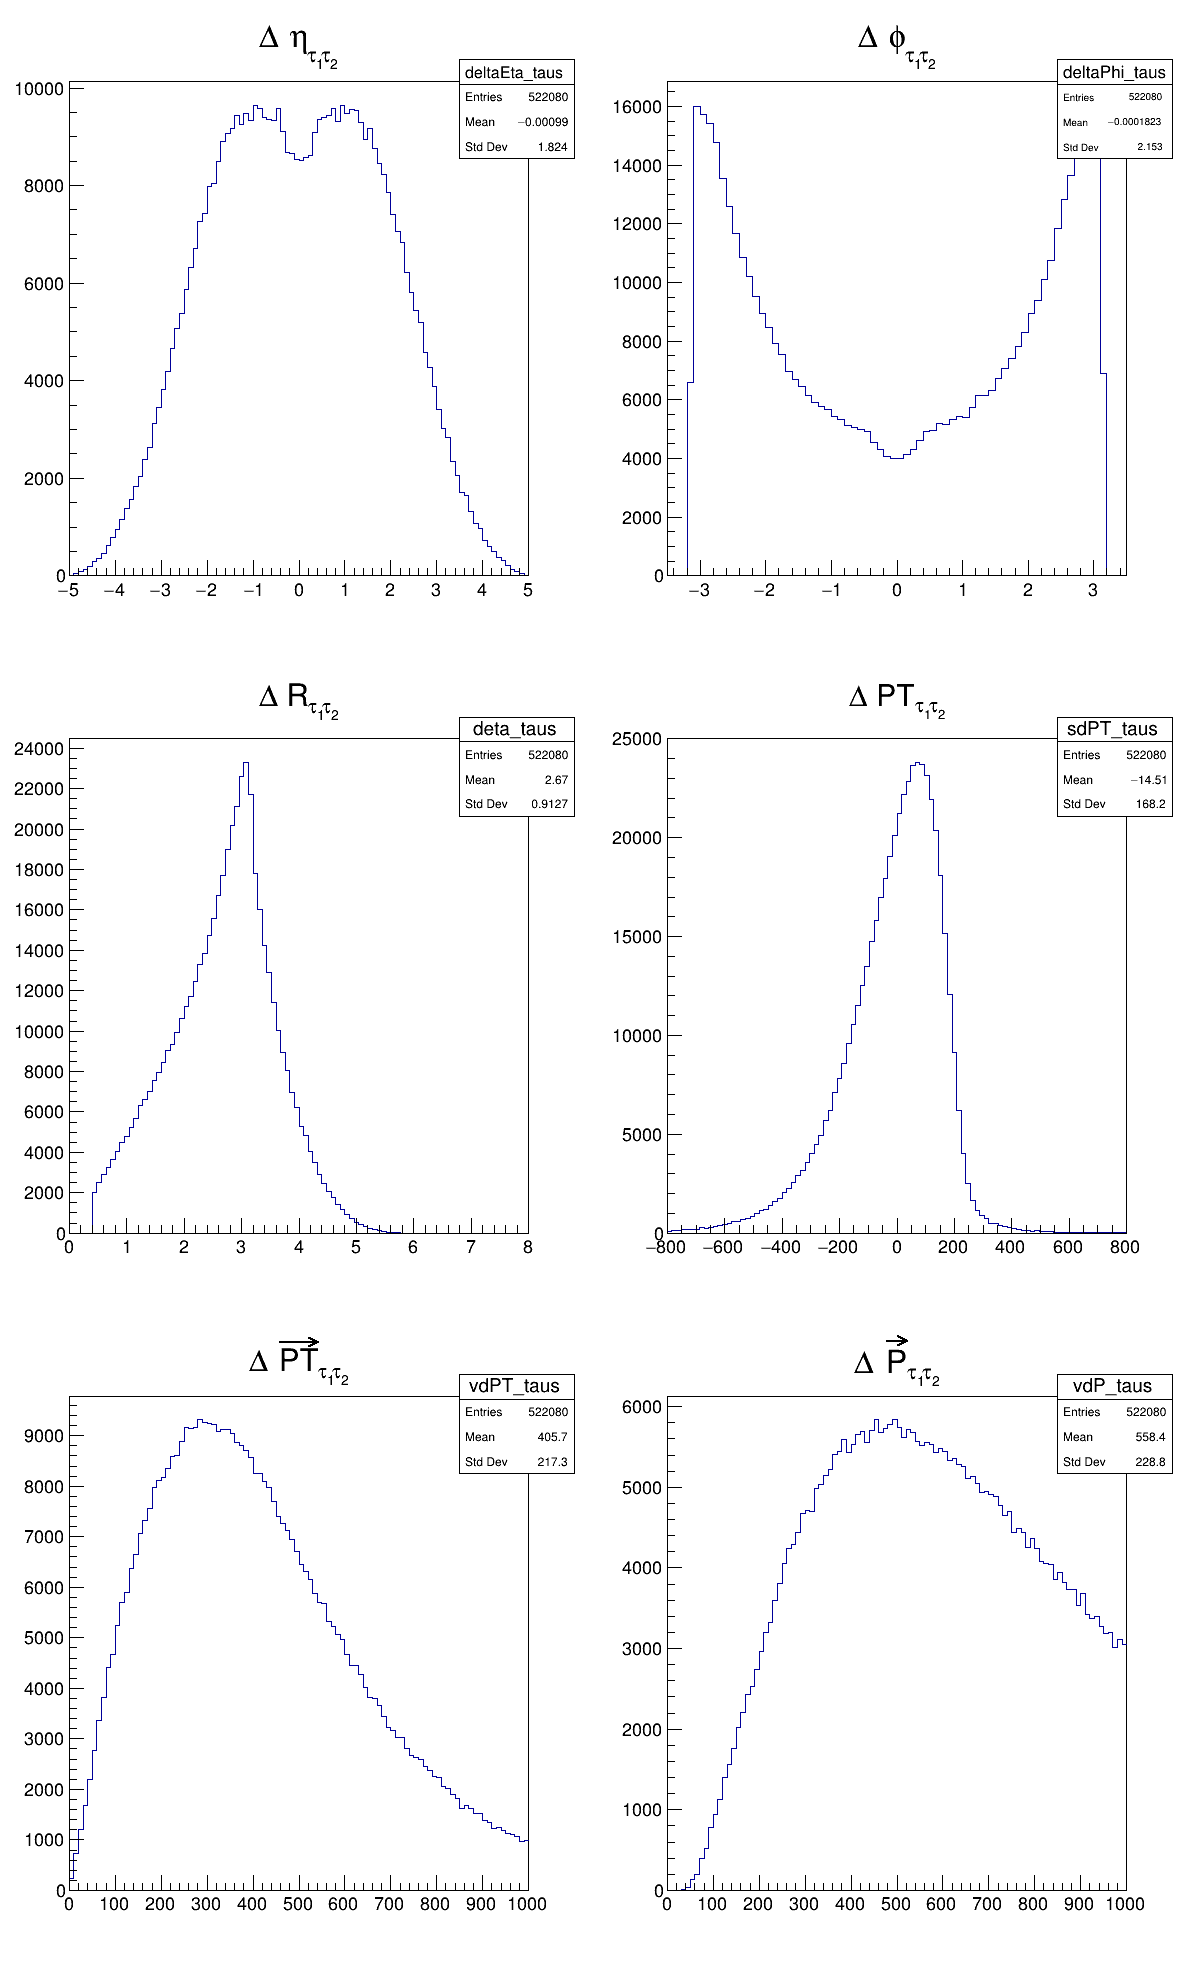

In [23]:
scanvas = TCanvas("SCanvas","",1200,2000)
scanvas.Divide(2,3)
scanvas.cd(1)
hist_deltaEta_taus.Draw("hist")
scanvas.cd(2)
hist_deltaPhi_taus.Draw("hist")
scanvas.cd(3)
hist_deltar_taus.Draw("hist")
scanvas.cd(4)
hist_sdPT_taus.Draw("hist")
scanvas.cd(5)
hist_vdPT_taus.Draw("hist")
scanvas.cd(6)
hist_vdP_taus.Draw("hist")
scanvas.Draw()

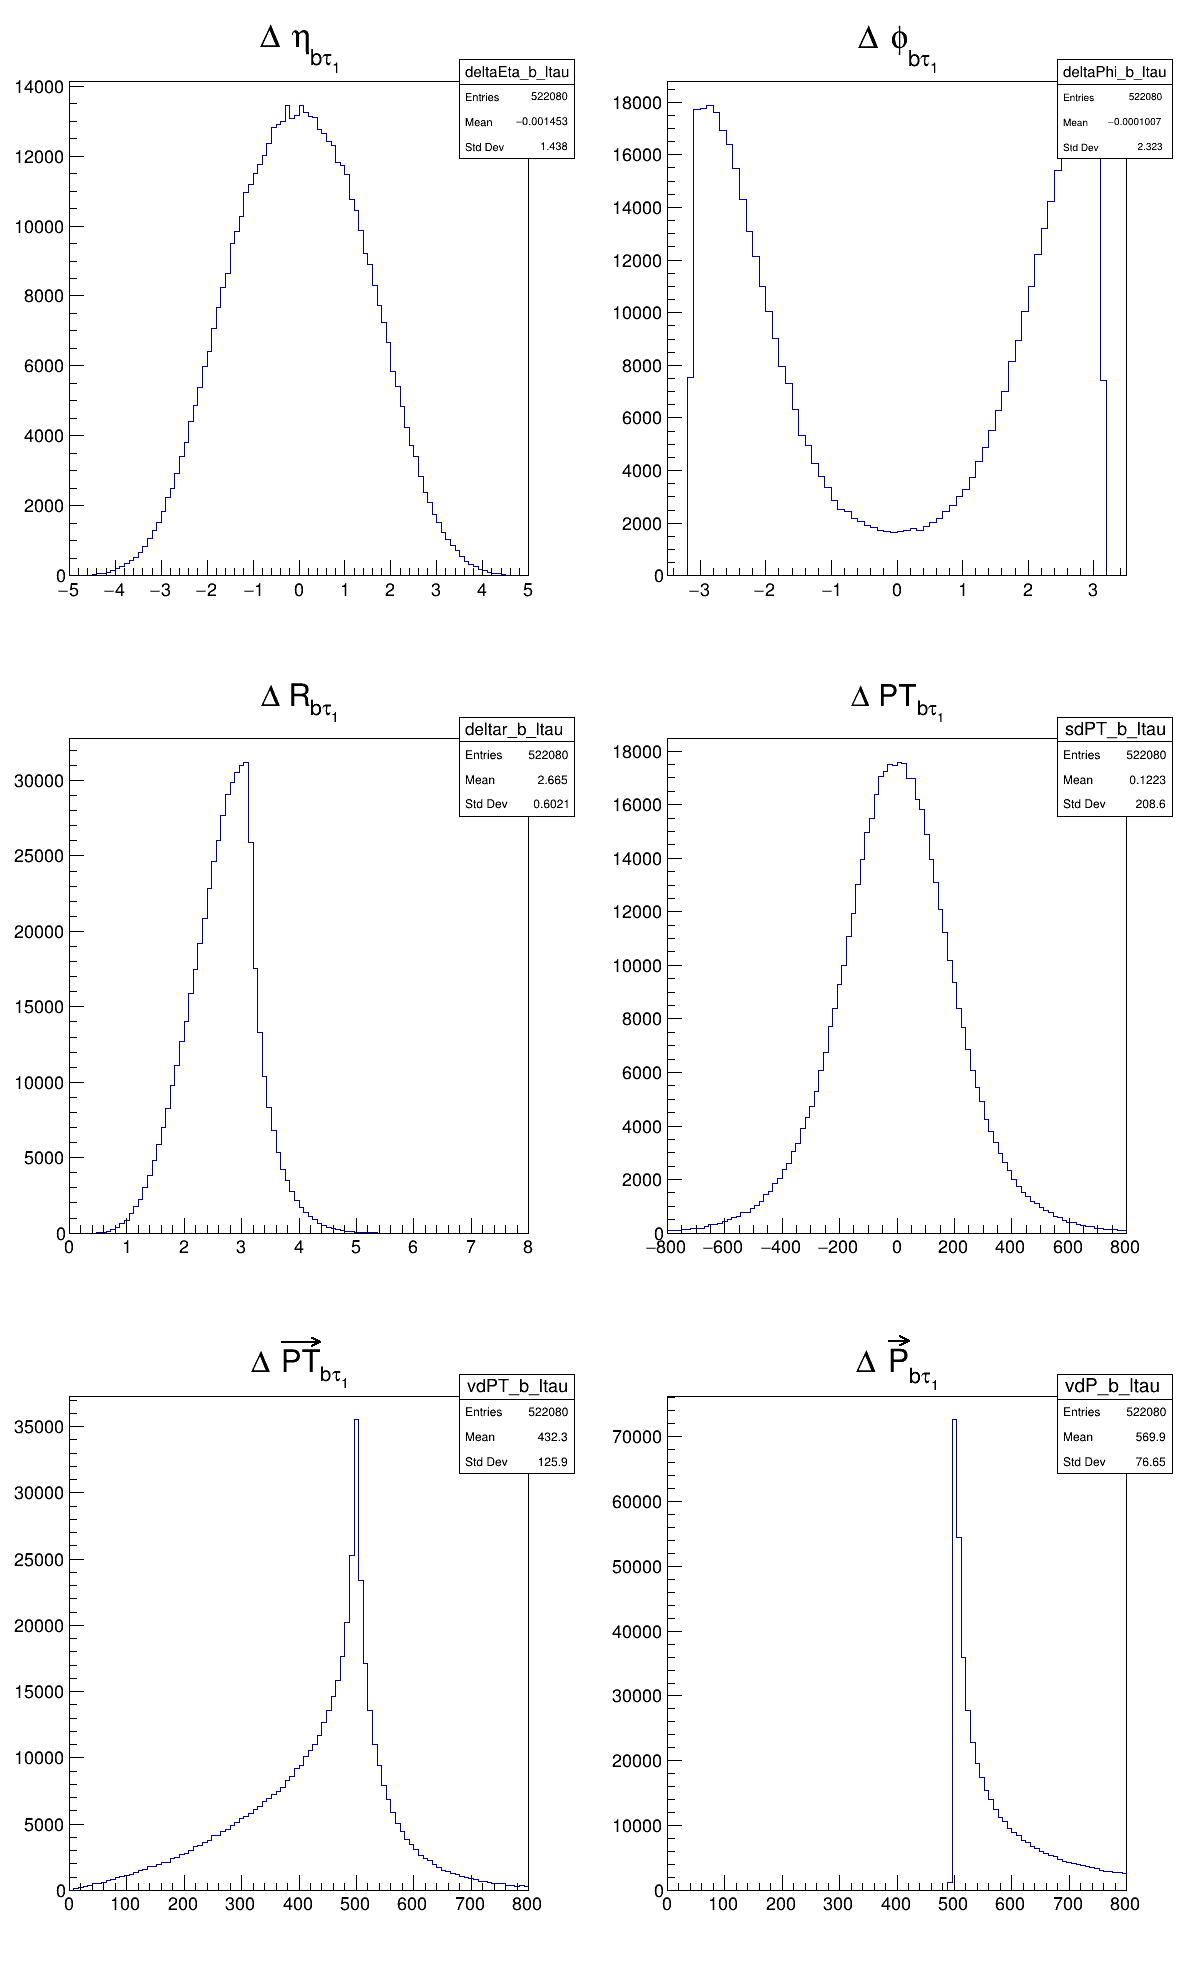

In [24]:
scanvas.cd(1)
hist_deltaEta_b_ltau.Draw("hist")
scanvas.cd(2)
hist_deltaPhi_b_ltau.Draw("hist")
scanvas.cd(3)
hist_deltar_b_ltau.Draw("hist")
scanvas.cd(4)
hist_sdPT_b_ltau.Draw("hist")
scanvas.cd(5)
hist_vdPT_b_ltau.Draw("hist")
scanvas.cd(6)
hist_vdP_b_ltau.Draw("hist")

scanvas.Draw()

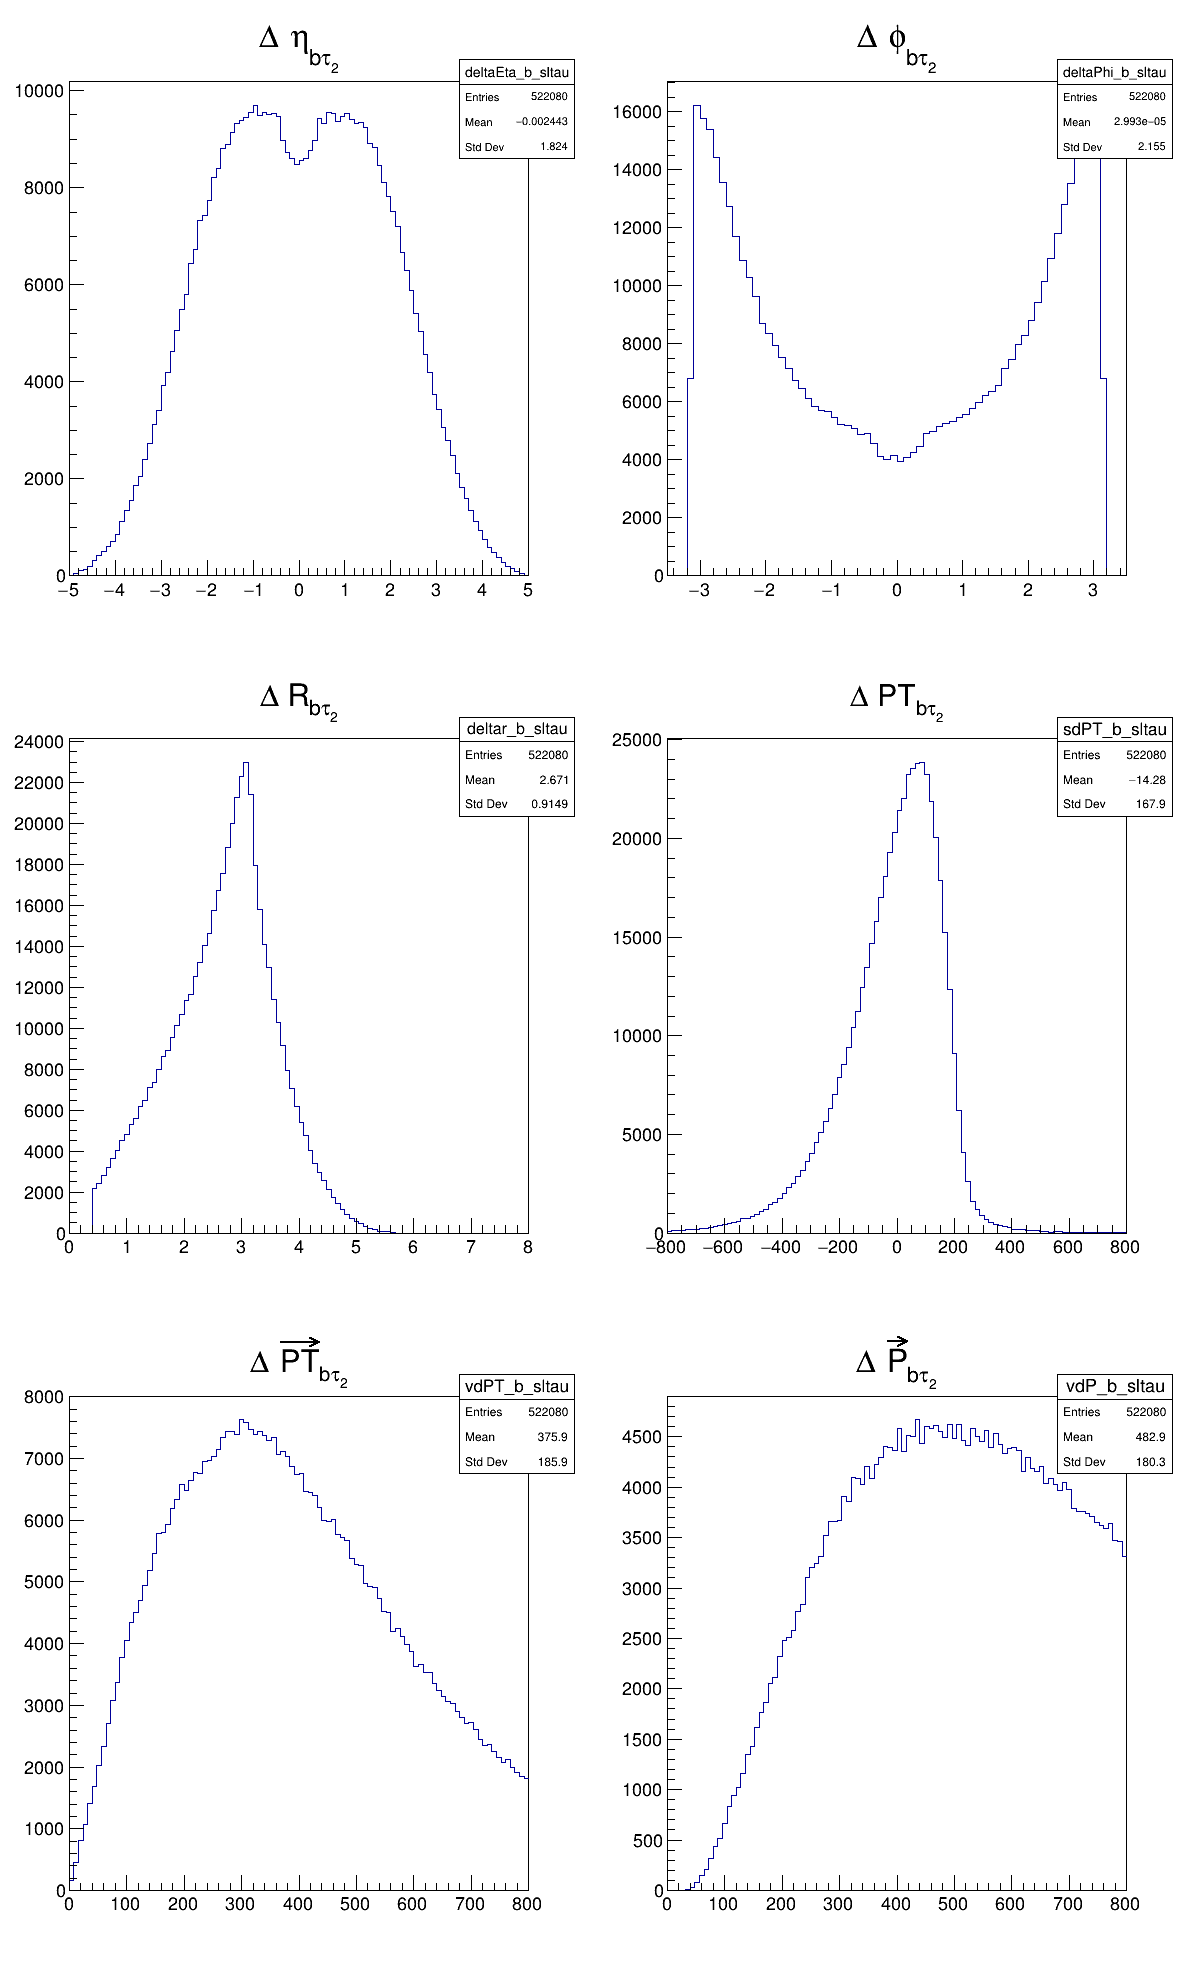

In [25]:
scanvas.cd(1)
hist_deltaEta_b_sltau.Draw("hist")
scanvas.cd(2)
hist_deltaPhi_b_sltau.Draw("hist")
scanvas.cd(3)
hist_deltar_b_sltau.Draw("hist")
scanvas.cd(4)
hist_sdPT_b_sltau.Draw("hist")
scanvas.cd(5)
hist_vdPT_b_sltau.Draw("hist")
scanvas.cd(6)
hist_vdP_b_sltau.Draw("hist")

scanvas.Draw()

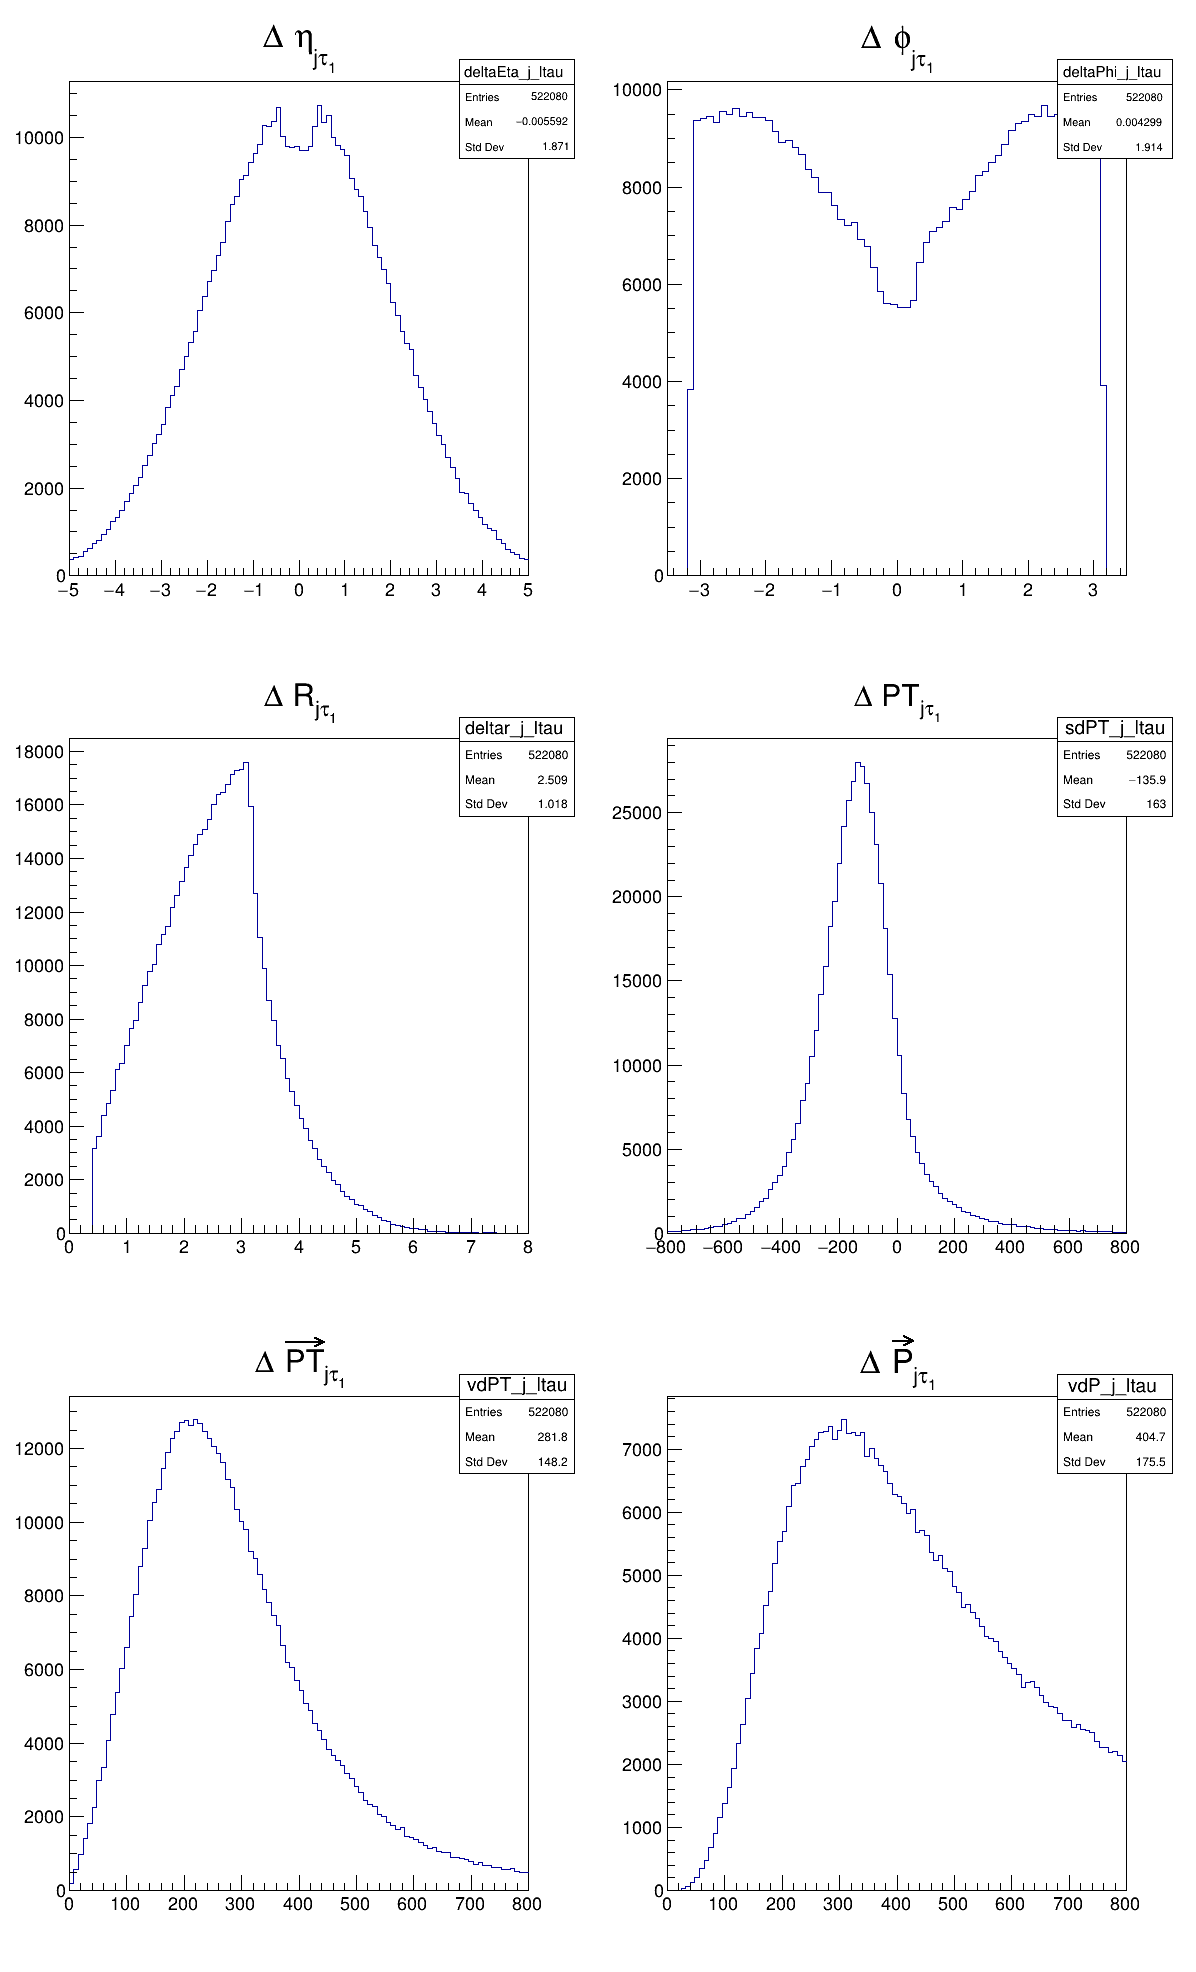

In [26]:
scanvas.cd(1)
hist_deltaEta_j_ltau.Draw("hist")
scanvas.cd(2)
hist_deltaPhi_j_ltau.Draw("hist")
scanvas.cd(3)
hist_deltar_j_ltau.Draw("hist")
scanvas.cd(4)
hist_sdPT_j_ltau.Draw("hist")
scanvas.cd(5)
hist_vdPT_j_ltau.Draw("hist")
scanvas.cd(6)
hist_vdP_j_ltau.Draw("hist")
scanvas.Draw()

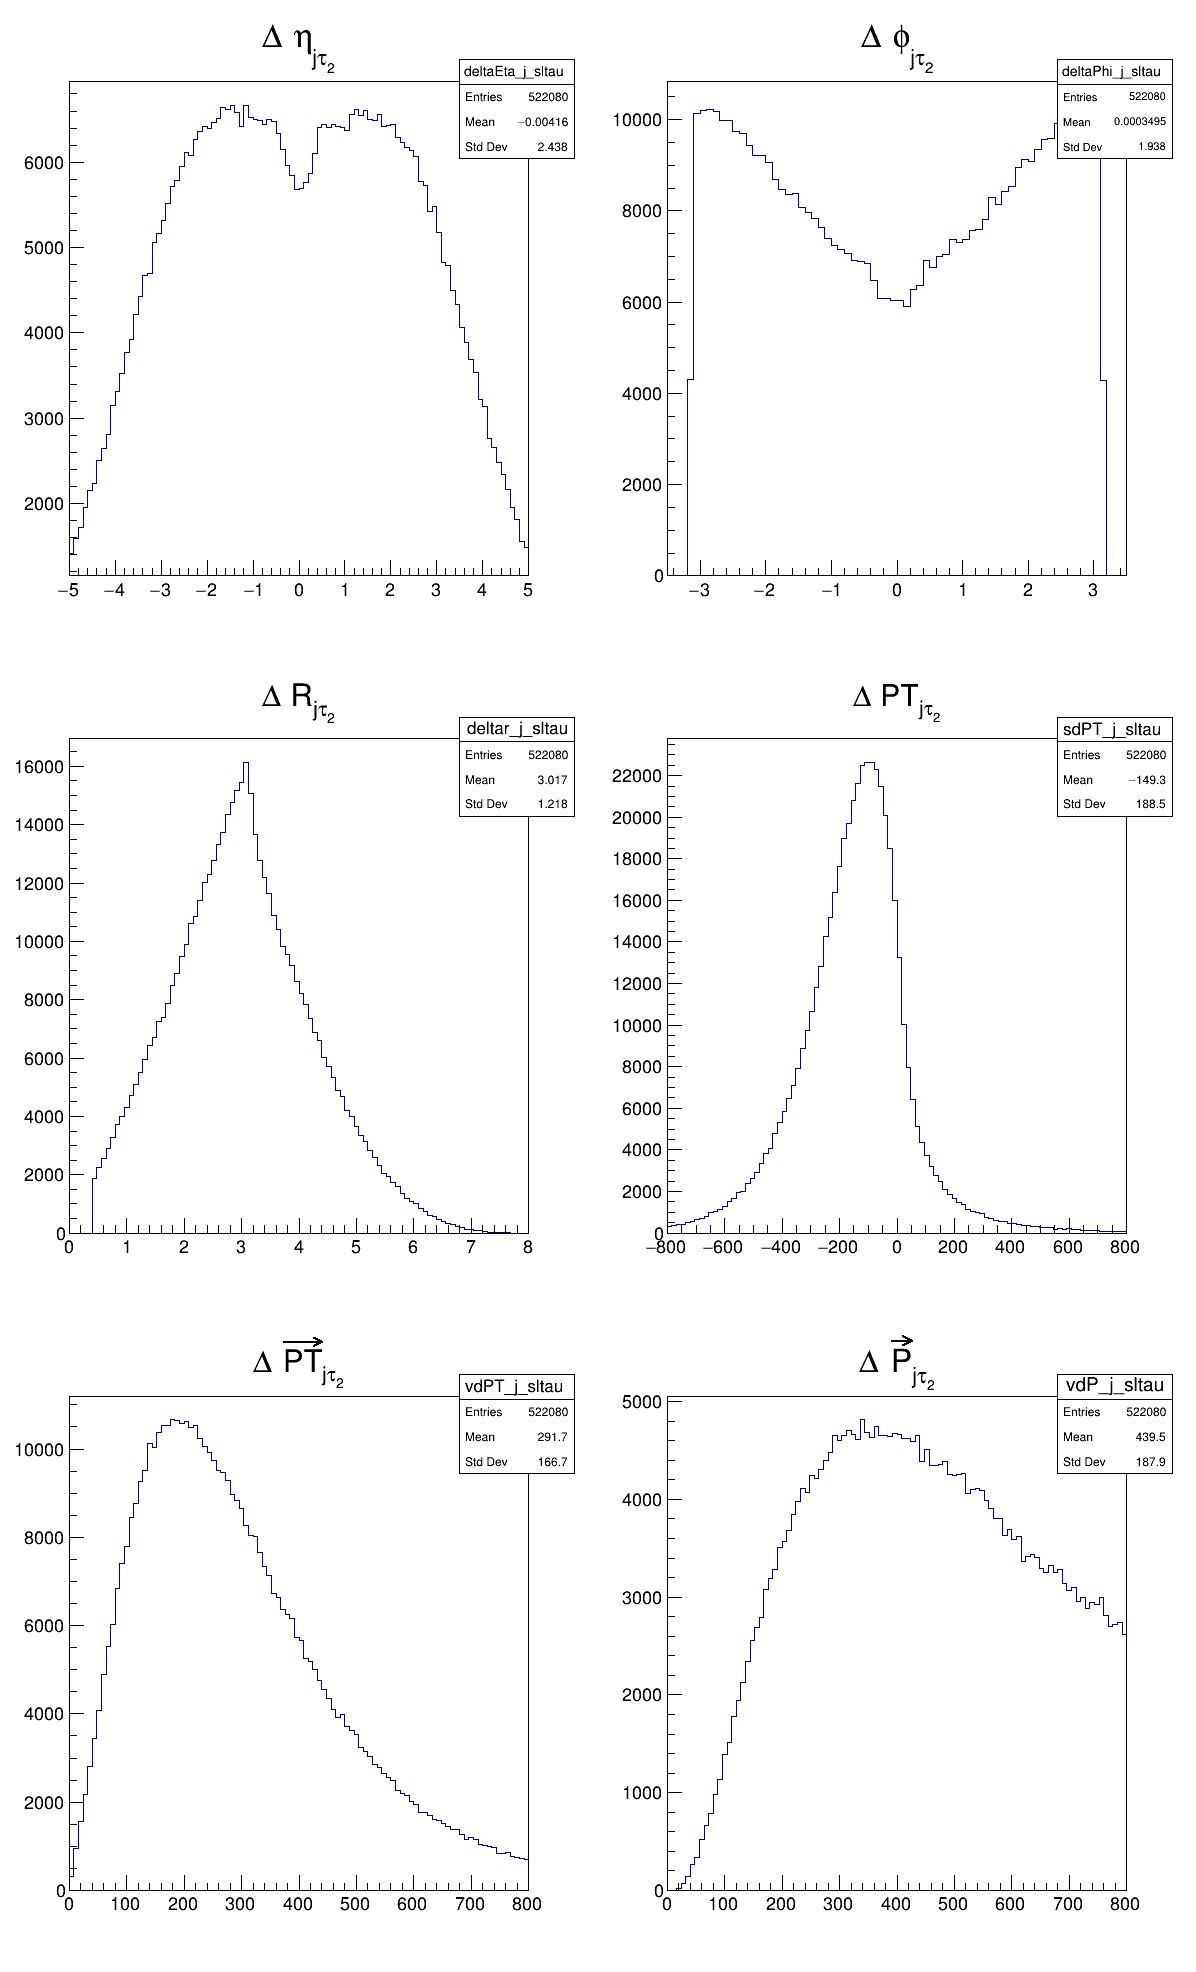

In [27]:
scanvas.cd(1)
hist_deltaEta_j_sltau.Draw("hist")
scanvas.cd(2)
hist_deltaPhi_j_sltau.Draw("hist")
scanvas.cd(3)
hist_deltar_j_sltau.Draw("hist")
scanvas.cd(4)
hist_sdPT_j_sltau.Draw("hist")
scanvas.cd(5)
hist_vdPT_j_sltau.Draw("hist")
scanvas.cd(6)
hist_vdP_j_sltau.Draw("hist")
scanvas.Draw()

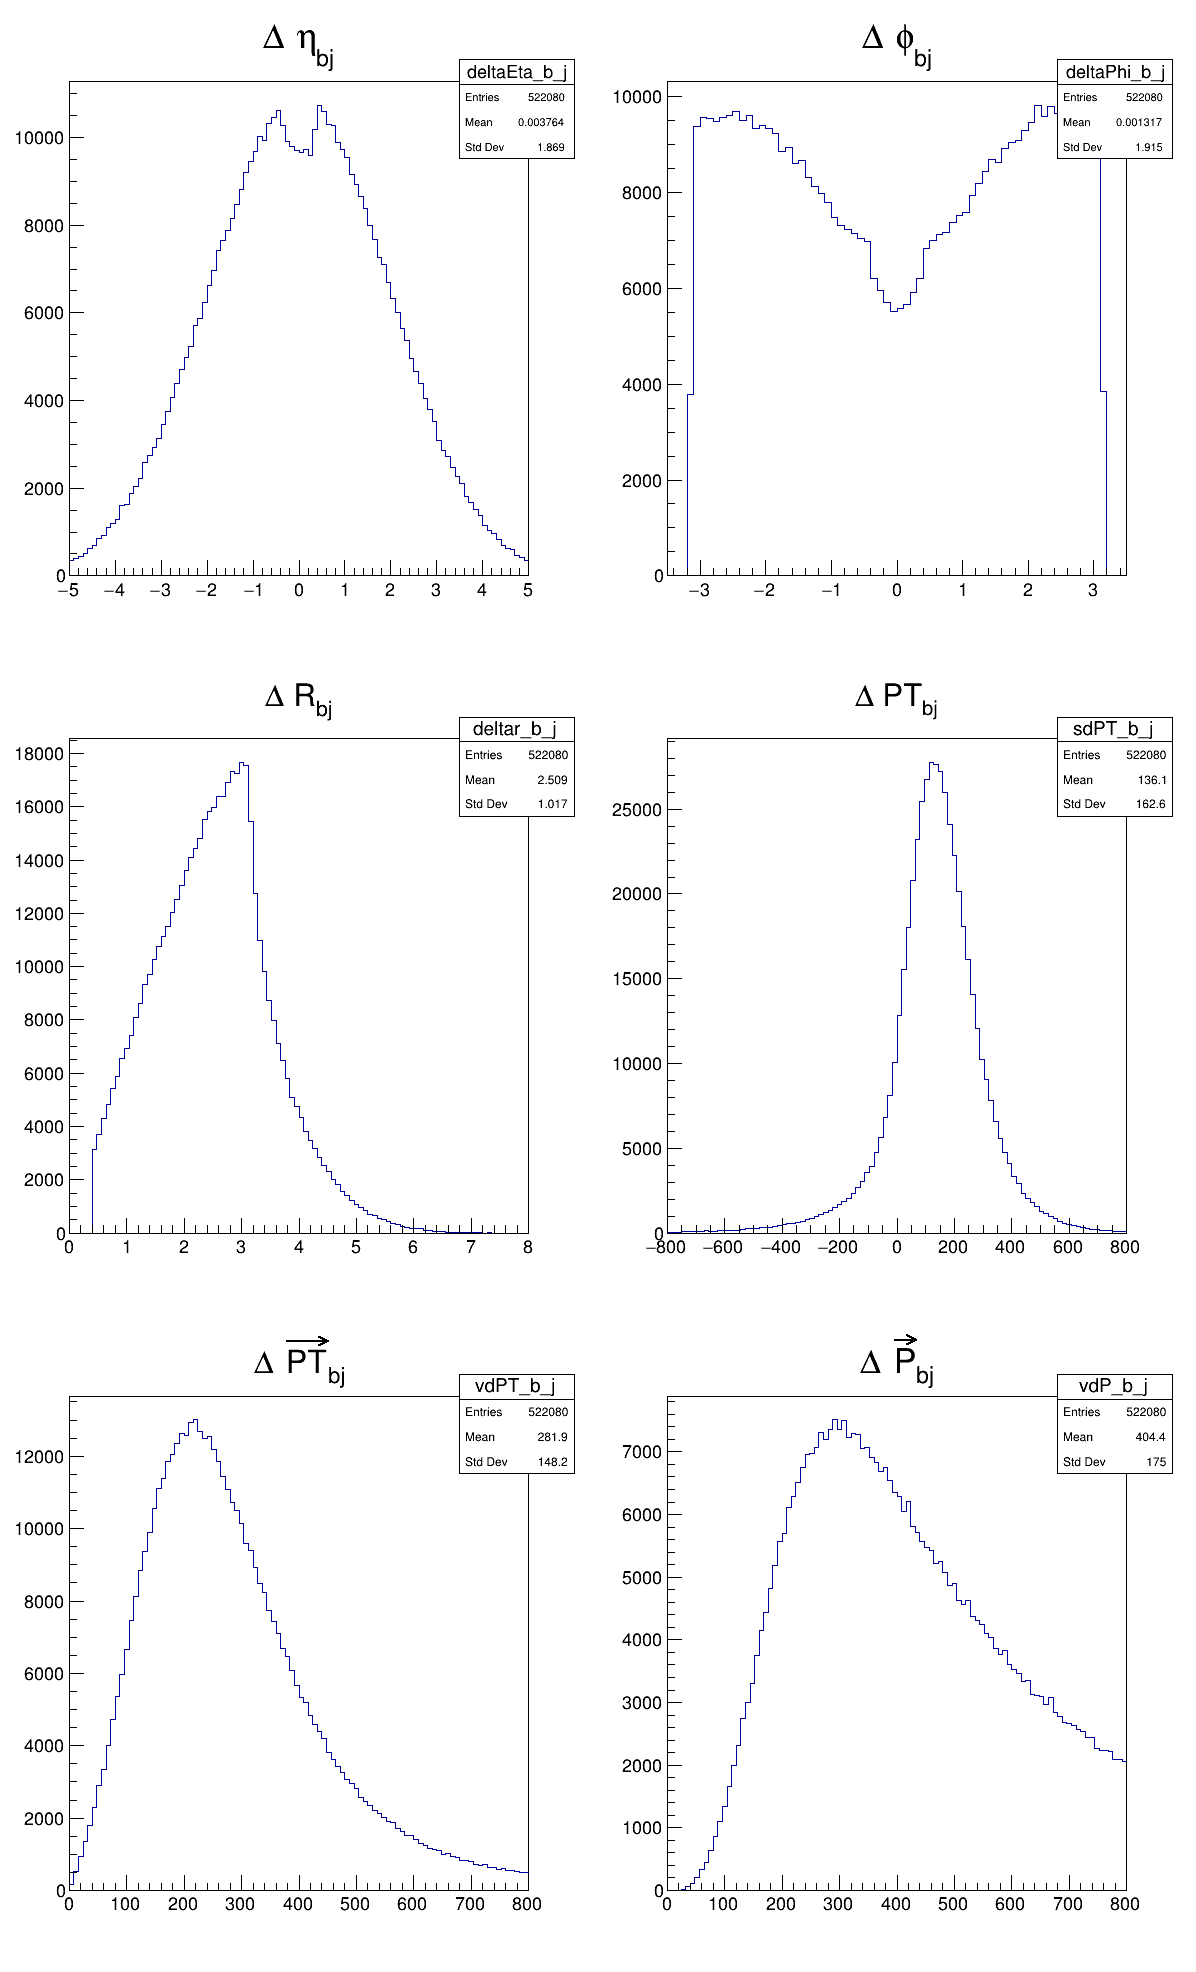

In [28]:
scanvas.cd(1)
hist_deltaEta_b_j.Draw("hist")
scanvas.cd(2)
hist_deltaPhi_b_j.Draw("hist")
scanvas.cd(3)
hist_deltar_b_j.Draw("hist")
scanvas.cd(4)
hist_sdPT_b_j.Draw("hist")
scanvas.cd(5)
hist_vdPT_b_j.Draw("hist")
scanvas.cd(6)
hist_vdP_b_j.Draw("hist")
scanvas.Draw()

In [29]:
def writehistlist(name):
    l = TList()
    l.Add(cutflow)
    l.Add(hist_njets)
    l.Add(hist_m_LQ)
    l.Add(hist_pt_LQ)
    l.Add(hist_m_LQ_met)
    l.Add(hist_pt_LQ_met)
    l.Add(hist_met)
    l.Add(pt_all_jets)
    l.Add(p_all_jets)
    l.Add(eta_all_jets)
    l.Add(pt_lead_jets)
    l.Add(p_lead_jets)
    l.Add(eta_lead_jets)
    l.Add(pt_lead_bjets)
    l.Add(p_lead_bjets)
    l.Add(eta_lead_bjets)
    l.Add(pt_lead_taus)
    l.Add(p_lead_taus)
    l.Add(eta_lead_taus)
    l.Add(pt_slead_taus)
    l.Add(p_slead_taus)
    l.Add(eta_slead_taus)
    l.Add(hist_deltar_taus)
    l.Add(hist_deltar_b_ltau)
    l.Add(hist_deltar_b_sltau)
    l.Add(hist_deltar_j_ltau)
    l.Add(hist_deltar_j_sltau)
    l.Add(hist_deltar_b_j)
    
    l.Add(hist_deltaEta_taus)
    l.Add(hist_deltaEta_b_ltau)
    l.Add(hist_deltaEta_b_sltau)
    l.Add(hist_deltaEta_j_ltau)
    l.Add(hist_deltaEta_j_sltau)
    l.Add(hist_deltaEta_b_j)
    
    l.Add(hist_deltaPhi_taus)
    l.Add(hist_deltaPhi_b_ltau)
    l.Add(hist_deltaPhi_b_sltau)
    l.Add(hist_deltaPhi_j_ltau)
    l.Add(hist_deltaPhi_j_sltau)
    l.Add(hist_deltaPhi_b_j)

    l.Add(hist_sdPT_taus)
    l.Add(hist_sdPT_b_ltau)
    l.Add(hist_sdPT_b_sltau)
    l.Add(hist_sdPT_j_ltau)
    l.Add(hist_sdPT_j_sltau)
    l.Add(hist_sdPT_b_j)

    l.Add(hist_vdPT_taus)
    l.Add(hist_vdPT_b_ltau)
    l.Add(hist_vdPT_b_sltau)
    l.Add(hist_vdPT_j_ltau)
    l.Add(hist_vdPT_j_sltau)
    l.Add(hist_vdPT_b_j)

    l.Add(hist_vdP_taus)
    l.Add(hist_vdP_b_ltau)
    l.Add(hist_vdP_b_sltau)
    l.Add(hist_vdP_j_ltau)
    l.Add(hist_vdP_j_sltau)
    l.Add(hist_vdP_b_j)
    f =TFile(name+".root","RECREATE")
    l.Write("histlist", TObject.kSingleKey)
    f.ls()

In [30]:
if(parton_analysis):
    writehistlist(namesignal+"_parton")
else:
    writehistlist(namesignal+"_hadron")

TFile**		SingleLQ_500_parton.root	
 TFile*		SingleLQ_500_parton.root	
  KEY: TList	histlist;1	Doubly linked list
